In [5]:
'''
Batch GD : go through all of the data and adjust the parameters.

Stochastic GD : randomly pick a data and adjust the parameters and again pick randmly other data and so on

Mini batch GD : randomly pick a set/group/batch of data and the adjust the parameters

'''

'\nBatch GD : go through all of the data and adjust the parameters.\n\nStochastic GD : randomly pick a data and adjust the parameters and again pick randmly other data and so on\n\nMini batch GD : randomly pick a set/group/batch of data and the adjust the parameters\n\n'

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Import Data:
import requests
url = 'https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/8_sgd_vs_gd/homeprices_banglore.csv'
res = requests.get(url, allow_redirects=True)
with open('homeprices_banglore.csv','wb') as file:
    file.write(res.content)
sales_team = pd.read_csv('homeprices_banglore.csv')

df = pd.read_csv('homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [8]:
# Apply Feature Scaling:

from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price' , axis='columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))

In [9]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [10]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [11]:
cost_list = []
epoch_list = []

def batch_gd(X , y_true , epochs , rate=0.01):
 
    #intialise parameters:
    number_of_features = X.shape[1]
    w = np.ones(number_of_features)
    b = 0
    total_samples = X.shape[0]
    
    #Define Predicted:
    for i in range(epochs):
        y_predicted = (np.dot(w,(scaled_x).T)) + b
    
        dj_dw = (-2/total_samples)*(X.T.dot(y_true - y_predicted))
        dj_db = (-2/total_samples)*np.sum(y_true- y_predicted)
    
        #Updating Parameters:
        w = w - rate*dj_dw
        b = b - rate*dj_db
    
        #defining loss:
        cost = np.mean(np.square(y_true-y_predicted))
    
        print(f'epoch:{i} , w1:{w[0]} , w2:{w[1]} , b:{b}')
    
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w , b , cost , epochs

In [12]:
batch_gd(scaled_x , scaled_y.reshape(scaled_y.shape[0],) ,500)

epoch:0 , w1:0.9955131745567446 , w2:0.9944565536398468 , b:-0.009603223499361428
epoch:1 , w1:0.9911380249223272 , w2:0.9890560098827677 , b:-0.01893011242383822
epoch:2 , w1:0.9868714861624255 , w2:0.9837944297305472 , b:-0.027988337737967186
epoch:3 , w1:0.9827105781502088 , w2:0.9786679832127075 , b:-0.03678535797563436
epoch:4 , w1:0.9786524032183148 , w2:0.9736729463678436 , b:-0.04532842512187645
epoch:5 , w1:0.974694143875839 , w2:0.9688056983085388 , b:-0.0536245903318283
epoch:6 , w1:0.970833060588534 , w2:0.9640627183675456 , b:-0.061680709491325494
epoch:7 , w1:0.9670664896204711 , w2:0.9594405833229824 , b:-0.0695034486235463
epoch:8 , w1:0.9633918409354602 , w2:0.9549359647003581 , b:-0.07709928914595568
epoch:9 , w1:0.9598065961565748 , w2:0.9505456261492972 , b:-0.08447453298169641
epoch:10 , w1:0.9563083065821735 , w2:0.9462664208928976 , b:-0.09163530752945695
epoch:11 , w1:0.952894591256852 , w2:0.9420952892477099 , b:-0.09858757049573495
epoch:12 , w1:0.949563135095

(array([0.70712464, 0.67456527]),
 -0.23034857438407427,
 0.0068641890429808105,
 500)

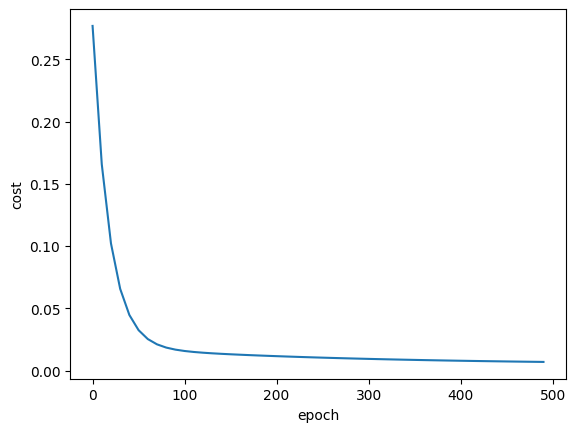

In [13]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

# Stochastic Gradient Descent

In [38]:
import random
random_index = random.randint(0,scaled_x.shape[0]-1)
sample_x = scaled_x[random_index]
sample_y = scaled_y[random_index]

print(sample_x.shape)
print(np.reshape(sample_y , (-1,1)).shape)

(2,)
(1, 1)


In [61]:
def stochastic_gd(X , y_true , epochs , rate=0.01):
    number_of_features = X.shape[1]
    
    ##initalising Parameters:
    W = np.ones(number_of_features)
    b = 0
    total_samples = X.shape[0]
    
    for i in range(epochs):
        ##Setting up random indices:
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted=np.dot(W.T,sample_x)
        
        ##Defining Derivatives:
#         dj_dw = -(2/total_samples)*(((sample_x).T).dot(sample_y - y_predicted))
        dj_dw =  w_grad = ( 2 / total_samples )*np.dot( np.transpose( sample_x ), ( y_predicted - y_true ))
        dj_db = (-2/total_samples)*(sample_y - y_predicted)
        
        ##Running Gradient Descent:
        W = W - rate*dj_dw
        b = b - rate*dj_db
        
        ##defining loss Function:
        cost = np.square(sample_y - y_predicted)
        
        epoch_lists = []
        cost_lists = []
        
        if i%10 == 0:
            cost_lists.append(cost)
            epoch_lists.append(i)
        print(f'Epoch:{i} , w0:{W[0]} , w1:{W[1]} , b:{b} , loss:{cost}')
        
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.plot(epoch_lists , cost_lists)

In [62]:
stochastic_gd(scaled_x , scaled_y , 500)

ValueError: shapes (2,) and (20,1) not aligned: 2 (dim 0) != 20 (dim 0)